Basic analytics of activity of geo-vuln users who replied to others in keyword dataset (repliers only)

In [1]:
import pandas as pd
import numpy as np
import matplotlib
from collections import Counter
from scipy.stats import lognorm
import scipy.stats as st

%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

In [3]:
df_oneSide=pd.read_csv('../data/bbContextOntopicRepliesOnlyDF.csv',sep=';')

In [4]:
df_oneSide.columns

Index([u'id', u'username', u'user_id', u'geo_enabled', u'followCount',
       u'friendCount', u'faveCount', u'tweetCount', u'date', u'timing',
       u'coordinates', u'location', u'source', u'retweetCount', u'isRetweet',
       u'origTweet', u'origUser', u'origTime', u'origPlace',
       u'origUserCreated', u'contributors', u'hashtags', u'has_media', u'urls',
       u'mentions', u'replyWho', u'replyWhat', u'text'],
      dtype='object')

In [5]:
df_oneSide[df_oneSide.id==257692290242469888].values

array([[257692290242469888, 'BobbyFuchs', 33439403, True, 260, 98, 20,
        6642, '2012-10-15 04:00:04', 'before', '0',
        'T: 40.853956,-74.036771', 'web', 0, False, 0, '0', '0', '0', '0',
        0, '0', False, '[]', "[u'xLaStarr']", 'xLaStarr',
        257692056435171329,
        "@xLaStarr I'm inviting all of my friends... you're going to have a lot of work to do that night"]], dtype=object)

In [6]:
df_oneSide['dateObj']=pd.to_datetime(df_oneSide.date)

In [9]:
df_oneSide=df_oneSide.sort(['user_id','dateObj'])

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


## Correct for the Time Zone

In [10]:
df_oneSide.dateObj=df_oneSide.dateObj.apply(lambda x: x-pd.to_timedelta('0 days 04:00:00') if x<pd.to_datetime('2012-11-03 22:00:00') else x-pd.to_timedelta('0 days 05:00:00'))

In [11]:
df_oneSide.date=df_oneSide.dateObj

In [9]:
df_oneSide.to_csv('../data/bbContextOntopicRepliesOnlyDFtimeZone.csv',sep=';')

In [12]:
df_oneSide[df_oneSide.id==257692290242469888].values

array([[257692290242469888, 'BobbyFuchs', 33439403, True, 260, 98, 20,
        6642, Timestamp('2012-10-15 00:00:04'), 'before', '0',
        'T: 40.853956,-74.036771', 'web', 0, False, 0, '0', '0', '0', '0',
        0, '0', False, '[]', "[u'xLaStarr']", 'xLaStarr',
        257692056435171329,
        "@xLaStarr I'm inviting all of my friends... you're going to have a lot of work to do that night",
        Timestamp('2012-10-15 00:00:04')]], dtype=object)

## Limit the data to the Analysis Window of 10/15/2012-11/23/2012

In [13]:
df_oneSide=df_oneSide[(df_oneSide.dateObj>=pd.to_datetime('2012-10-15 00:00:00')) & (df_oneSide.dateObj<pd.to_datetime('2012-11-24 00:00:00'))]

In [14]:
len(df_oneSide)

1576214

In [15]:
replies=df_oneSide[df_oneSide.replyWho!='0']

In [16]:
len(replies)

475092

So about a third of these tweets are replies

In [17]:
grouped=df_oneSide.groupby('user_id')

In [30]:
df_oneSide['secDiff']=(grouped.dateObj.diff()).apply(lambda x: np.nan if pd.isnull(x) else x.item()/(10**9))

KeyboardInterrupt: 

In [29]:
np.max(df_oneSide.secDiff)

2850358.0

In [24]:
np.log(max(data))

14.862955158391138

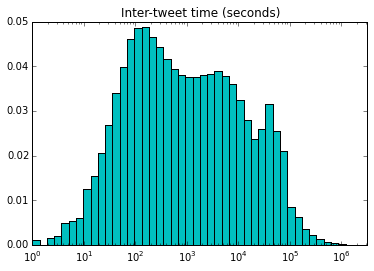

In [19]:
data = df_oneSide.secDiff.dropna().tolist()
bins=np.logspace(0, int(np.log(max(data))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(data,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
#plt.plot(bins[:-1], fit[:-1]*width, linewidth=2)
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.ylim(ymin=0, ymax=0.05)
plt.title("Inter-tweet time (seconds)")

**Takeway** 
* People take three kinds of breaks between tweets: less than 16 min, between 16 & 3 hours, and about a day.
* Most people live in 16 min break world, less live in 16min-3hour world, and even less live in a day world

# Get the distribution of times between outgoung replies

In [13]:
freq=replies.groupby(replies.user_id).size()

In [14]:
len(freq)

7205

In [15]:
f=Counter(freq.values)

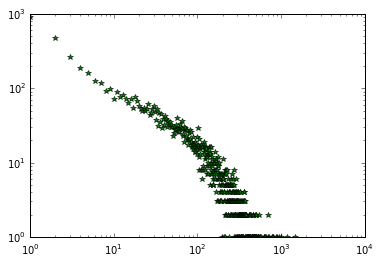

In [17]:
plt.loglog(f.keys(),f.values(),'g*')

In [18]:
grouped=replies.groupby('user_id')

In [19]:
replies['secDiff']=(grouped.dateObj.diff()).apply(lambda x: np.nan if pd.isnull(x) else x.item()/(10**9))

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


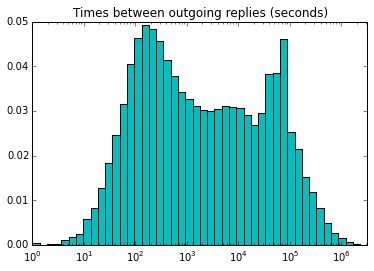

In [20]:
data=replies.secDiff.dropna().tolist()
bins=np.logspace(0, int(np.log(max(data))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(data,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.ylim(ymin=0, ymax=0.05)
plt.title("Times between outgoing replies (seconds)")

In [21]:
len(replies[~replies.secDiff.isnull()])/float(len(replies))

0.9848345162621135

In [22]:
len((replies.user_id[~replies.secDiff.isnull()]).unique())/float(len(replies.user_id.unique()))

0.8745315752949341

So only 2% of tweets are missed, but 13% of the users don't have more than one reply

**Takeway** 
* People take three kinds of breaks between replies: less than 16 min, between 16 & 3 hours, and about a day.
* These are the same kind of breaks people take between tweets
* So as temporal practice, replying to something has the same temporal patterns as just tweeting
* But in replying, more people live in a day break world - almost as many as in the 16 min world

# Time between outgoing replies in different disaster stages

In [23]:
before=replies[(replies.dateObj>=pd.to_datetime('2012-10-15 00:00:00')) & (replies.dateObj<pd.to_datetime('2012-10-25 00:00:00'))]

In [24]:
during=replies[(replies.dateObj>=pd.to_datetime('2012-10-25 00:00:00')) & (replies.dateObj<pd.to_datetime('2012-11-04 00:00:00'))]

In [25]:
after=replies[(replies.dateObj>=pd.to_datetime('2012-11-04 00:00:00')) & (replies.dateObj<pd.to_datetime('2012-11-14 00:00:00'))]

In [26]:
lafter=replies[(replies.dateObj>=pd.to_datetime('2012-11-14 00:00:00')) & (replies.dateObj<pd.to_datetime('2012-11-23 00:00:00'))]

In [27]:
bSecDiff=before.secDiff.dropna().tolist()

In [28]:
dSecDiff=during.secDiff.dropna().tolist()

In [29]:
aSecDiff=after.secDiff.dropna().tolist()

In [30]:
laSecDiff=lafter.secDiff.dropna().tolist()

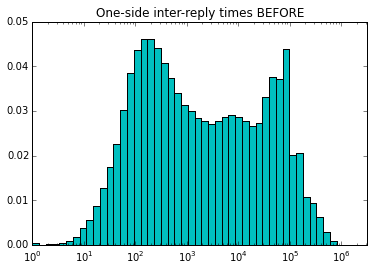

In [31]:
bins=np.logspace(0, int(np.log(max(bSecDiff))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(bSecDiff,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.title('One-side inter-reply times BEFORE')

In [32]:
np.median(bSecDiff)

1448.0

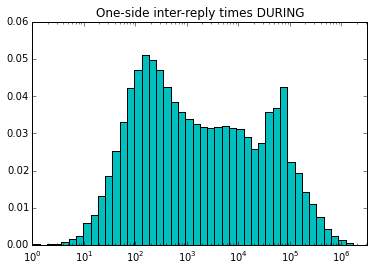

In [33]:
bins=np.logspace(0, int(np.log(max(dSecDiff))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(dSecDiff,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.title('One-side inter-reply times DURING')

In [34]:
np.median(dSecDiff)

1324.0

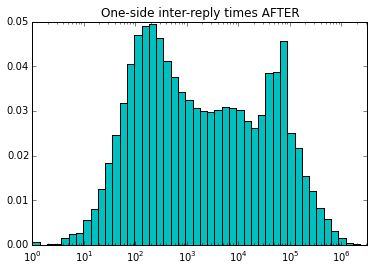

In [35]:
bins=np.logspace(0, int(np.log(max(aSecDiff))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(aSecDiff,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.title('One-side inter-reply times AFTER')

In [36]:
np.median(aSecDiff)

1482.0

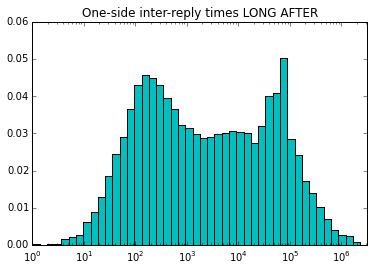

In [37]:
bins=np.logspace(0, int(np.log(max(laSecDiff))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(laSecDiff,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.title('One-side inter-reply times LONG AFTER')

In [38]:
np.median(laSecDiff)

1999.5

**Takeway**
* These are reply activities of particular users - one side of the conversation (many potential conversations)
* The same temporal practice is present in different disaster stages
* But during, the about-a-day world is less populous than before, after, or long after
* So **in crisis, some people shift from one practice (a day) to another** (16 mins goes up)

# Compare the timing of the ontopic vs offtopic tweets

In [45]:
ontopic=np.fromfile('/home/mako0970/ReplyPaperNew/data/bbRepliersOnlyKeywordTweets.csv', sep=',')

In [46]:
len(ontopic)

126812

In [47]:
ontopDF=df_oneSide[df_oneSide.id.isin(ontopic)]

In [48]:
len(ontopDF)

114883

In [49]:
nontopDF=df_oneSide[~df_oneSide.id.isin(ontopic)]

In [50]:
len(nontopDF)

1430459

Recalculate secDiff, b/c it's different here since it's only keyword (ontopic) tweets

In [51]:
grouped=ontopDF.groupby('user_id')
ontopDF['secDiff']=(grouped.dateObj.diff()).apply(lambda x: np.nan if pd.isnull(x) else x.item()/(10**9))

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [52]:
ontopicSecDiff=ontopDF.secDiff.dropna().tolist()

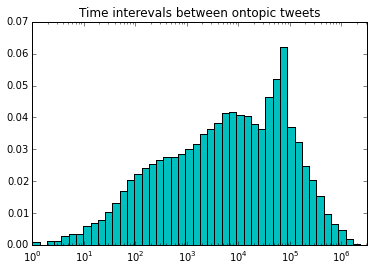

In [53]:
bins=np.logspace(0, int(np.log(max(ontopicSecDiff))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(ontopicSecDiff,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.title('Time interevals between ontopic tweets')

In [54]:
grouped=nontopDF.groupby('user_id')
nontopDF['secDiff']=(grouped.dateObj.diff()).apply(lambda x: np.nan if pd.isnull(x) else x.item()/(10**9))

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [55]:
nontopicSecDiff=nontopDF.secDiff.dropna().tolist()

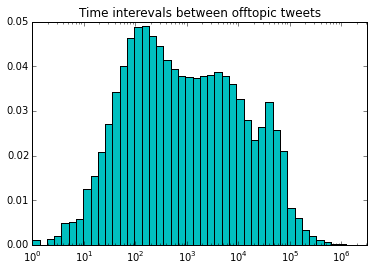

In [56]:
bins=np.logspace(0, int(np.log(max(nontopicSecDiff))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(nontopicSecDiff,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.title('Time interevals between offtopic tweets')

**Takeway**
* Off topic tweets have pretty much the same temporal patterns as tweets overall
* On topic tweets have peaks with more or less the same centers, but all the mass is pushed towards the once a day practice
* So **hurricane related communication fits into existing comm practice, just the more infrequent part of it?**
* **Because tweets w/ keywords are only part of their comm** (even-hurricane related)

# Compare the timing of ontopic and offtopic Replies (one side)

In [57]:
ontopRep=ontopDF[ontopDF.replyWho!='0']

In [58]:
nontopRep=nontopDF[nontopDF.replyWho!='0']

In [59]:
len(ontopRep)

17148

In [60]:
len(nontopRep)

449620

Redo secDiff again, because now it's ontopic and Replies only

In [61]:
grouped=ontopRep.groupby('user_id')
ontopRep['secDiff']=(grouped.dateObj.diff()).apply(lambda x: np.nan if pd.isnull(x) else x.item()/(10**9))

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [62]:
grouped=nontopRep.groupby('user_id')
nontopRep['secDiff']=(grouped.dateObj.diff()).apply(lambda x: np.nan if pd.isnull(x) else x.item()/(10**9))

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [63]:
ontopRepSecDiff=ontopDF.secDiff.dropna().tolist()

In [64]:
nontopRepSecDiff=nontopDF.secDiff.dropna().tolist()

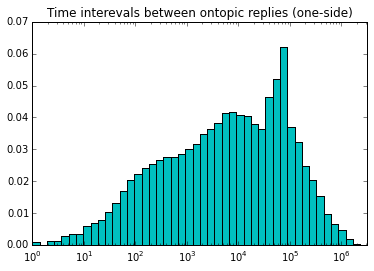

In [65]:
bins=np.logspace(0, int(np.log(max(ontopRepSecDiff))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(ontopRepSecDiff,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.title('Time interevals between ontopic replies (one-side)')

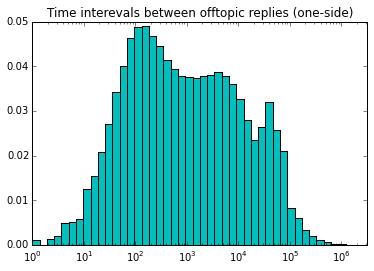

In [66]:
bins=np.logspace(0, int(np.log(max(nontopRepSecDiff))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(nontopRepSecDiff,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.title('Time interevals between offtopic replies (one-side)')

**Takeway**
The on topic and off topic replies follow pretty much the same patterns as on and off topic tweets

# Explore who reply tweets are replying to

In [67]:
KeyRepliedToTweets=np.fromfile('/home/mako0970/ReplyPaperNew/data/bbRepliedToKeywordTweets.csv', sep=',')

In [68]:
len(KeyRepliedToTweets)

30350

In [69]:
inter=list(set(replies.replyWhat.unique()) & set(KeyRepliedToTweets))

In [70]:
len(inter)

50

Only 50 tweets that were replied to by bb users were ontopic!!! So nothing to be gleaned here

<b> But how about replies to ontopic USERS (those who had ontopic tweets)</b>

In [71]:
ontopUsernamesRepliedTo=np.loadtxt('/home/mako0970/ReplyPaperNew/data/bbRepliedToKeywordUsernames.csv', dtype=str,delimiter=',')

In [72]:
len(ontopUsernamesRepliedTo)

2857

In [73]:
ontopRepliedTo=replies[replies.replyWho.isin(ontopUsernamesRepliedTo)]

In [74]:
nontopRepliedTo=replies[~replies.replyWho.isin(ontopUsernamesRepliedTo)]

In [75]:
grouped=ontopRepliedTo.groupby('user_id')
ontopRepliedTo['secDiff']=(grouped.dateObj.diff()).apply(lambda x: np.nan if pd.isnull(x) else x.item()/(10**9))

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [76]:
grouped=nontopRepliedTo.groupby('user_id')
nontopRepliedTo['secDiff']=(grouped.dateObj.diff()).apply(lambda x: np.nan if pd.isnull(x) else x.item()/(10**9))

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [77]:
ontopRepliedToSecDiff=ontopRepliedTo.secDiff.dropna().tolist()

In [78]:
nontopRepliedToSecDiff=nontopRepliedTo.secDiff.dropna().tolist()

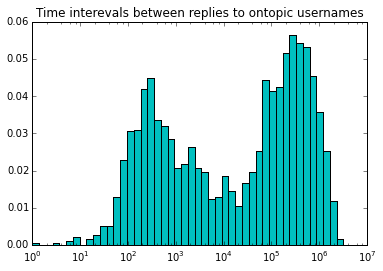

In [79]:
bins=np.logspace(0, int(np.log(max(ontopRepliedToSecDiff))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(ontopRepliedToSecDiff,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**7)
plt.title('Time interevals between replies to ontopic usernames')

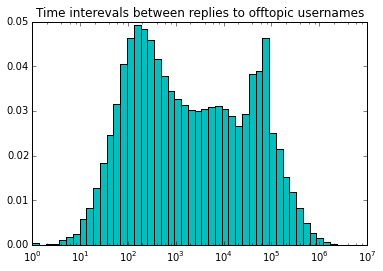

In [80]:
bins=np.logspace(0, int(np.log(max(nontopRepliedToSecDiff))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(nontopRepliedToSecDiff,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**7)
plt.title('Time interevals between replies to offtopic usernames')

# Check if inter-tweet times slow down During

In [39]:
before=df_oneSide[(df_oneSide.dateObj>=pd.to_datetime('2012-10-15 00:00:00')) & (df_oneSide.dateObj<pd.to_datetime('2012-10-25 00:00:00'))]

In [40]:
during=df_oneSide[(df_oneSide.dateObj>=pd.to_datetime('2012-10-25 00:00:00')) & (df_oneSide.dateObj<pd.to_datetime('2012-11-04 00:00:00'))]

In [41]:
after=df_oneSide[(df_oneSide.dateObj>=pd.to_datetime('2012-11-04 00:00:00')) & (df_oneSide.dateObj<pd.to_datetime('2012-11-14 00:00:00'))]

In [42]:
lafter=df_oneSide[(df_oneSide.dateObj>=pd.to_datetime('2012-11-14 00:00:00')) & (df_oneSide.dateObj<pd.to_datetime('2012-11-24 00:00:00'))]

In [43]:
bSecDiff=before.secDiff.dropna().tolist()

In [44]:
dSecDiff=during.secDiff.dropna().tolist()

In [45]:
aSecDiff=after.secDiff.dropna().tolist()

In [46]:
laSecDiff=lafter.secDiff.dropna().tolist()

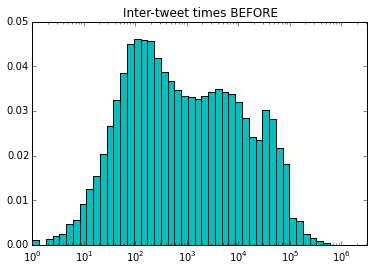

In [47]:
bins=np.logspace(0, int(np.log(max(bSecDiff))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(bSecDiff,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.title('Inter-tweet times BEFORE')

In [48]:
np.median(bSecDiff)

721.0

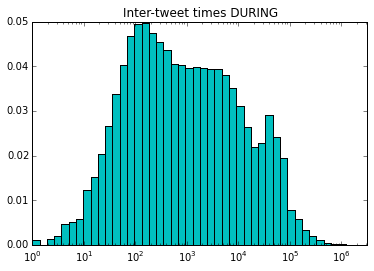

In [49]:
bins=np.logspace(0, int(np.log(max(dSecDiff))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(dSecDiff,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.title('Inter-tweet times DURING')

In [50]:
np.median(dSecDiff)

708.0

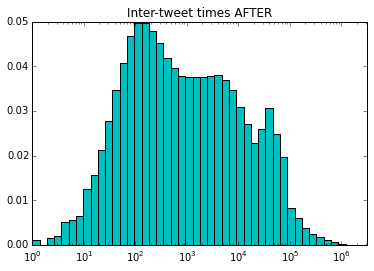

In [51]:
bins=np.logspace(0, int(np.log(max(aSecDiff))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(aSecDiff,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.title('Inter-tweet times AFTER')

In [52]:
np.median(aSecDiff)

695.0

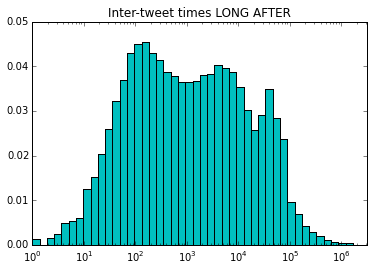

In [53]:
bins=np.logspace(0, int(np.log(max(laSecDiff))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(laSecDiff,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.title('Inter-tweet times LONG AFTER')

In [54]:
np.median(laSecDiff)

961.0

In [55]:
st.kruskal(bSecDiff,dSecDiff,aSecDiff,laSecDiff)

(1592.7692471500754, 0.0)

In [56]:
st.ranksums(bSecDiff, dSecDiff)

(8.463442712358594, 2.5959795875765841e-17)

In [57]:
st.ranksums(bSecDiff,aSecDiff)

(6.4888767594610108, 8.6478667135477548e-11)

In [58]:
st.ranksums(bSecDiff, laSecDiff)

(-25.034036046599116, 2.6055542382149547e-138)

In [59]:
st.ranksums(dSecDiff,aSecDiff)

(-1.7351621793438992, 0.082712083357921476)

In [60]:
st.ranksums(dSecDiff,laSecDiff)

(-37.064964197803249, 1.0310238206504313e-300)

In [61]:
st.ranksums(aSecDiff,laSecDiff)

(-33.599667449897758, 1.6963862275567848e-247)

In [46]:
0.05/6

0.008333333333333333

* So During and After are stat sig faster than Before and Long After
* But this is for all users
* How about just those who end up in our conversations?

## Check Only Convo users

In [4]:
convoUsers=np.loadtxt('../data/bbFinalConvoUsers.txt',dtype='str',delimiter=',')

In [5]:
len(convoUsers)

2763

In [6]:
df_oneSide=pd.read_csv('../data/bbContextOntopicRepliesOnlyDFtimeZone.csv',sep=';')

In [10]:
df_oneSide.dateObj=pd.to_datetime(df_oneSide.dateObj)

In [19]:
replies=df_oneSide[df_oneSide.replyWho!='0']

In [20]:
len(replies)

562512

So about a third of these tweets are replies

In [21]:
grouped=df_oneSide.groupby('user_id')

In [22]:
df_oneSide['secDiff']=(grouped.dateObj.diff()).apply(lambda x: np.nan if pd.isnull(x) else x.item()/(10**9))

In [24]:
convoDF=df_oneSide[df_oneSide.username.isin(convoUsers)]

In [25]:
len(convoDF)

809755

In [26]:
before=convoDF[(convoDF.dateObj>=pd.to_datetime('2012-10-15 00:00:00')) & (convoDF.dateObj<pd.to_datetime('2012-10-25 00:00:00'))]

In [27]:
during=convoDF[(convoDF.dateObj>=pd.to_datetime('2012-10-25 00:00:00')) & (convoDF.dateObj<pd.to_datetime('2012-11-04 00:00:00'))]

In [28]:
after=convoDF[(convoDF.dateObj>=pd.to_datetime('2012-11-04 00:00:00')) & (convoDF.dateObj<pd.to_datetime('2012-11-14 00:00:00'))]

In [29]:
lafter=convoDF[(convoDF.dateObj>=pd.to_datetime('2012-11-14 00:00:00')) & (convoDF.dateObj<pd.to_datetime('2012-11-24 00:00:00'))]

In [30]:
bSecDiff=before.secDiff.dropna().tolist()

In [31]:
dSecDiff=during.secDiff.dropna().tolist()

In [32]:
aSecDiff=after.secDiff.dropna().tolist()

In [33]:
laSecDiff=lafter.secDiff.dropna().tolist()

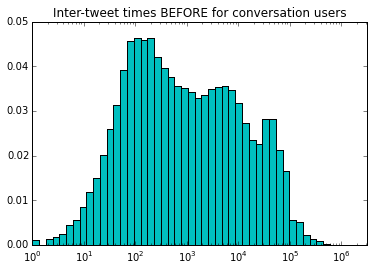

In [34]:
bins=np.logspace(0, int(np.log(max(bSecDiff))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(bSecDiff,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.title('Inter-tweet times BEFORE for conversation users')

In [35]:
np.median(bSecDiff)

716.0

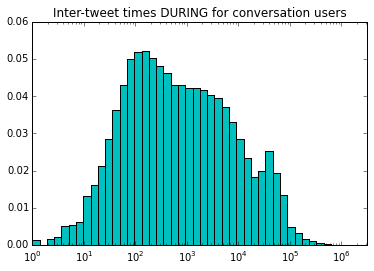

In [36]:
bins=np.logspace(0, int(np.log(max(dSecDiff))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(dSecDiff,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.title('Inter-tweet times DURING for conversation users')

In [37]:
np.median(dSecDiff)

568.0

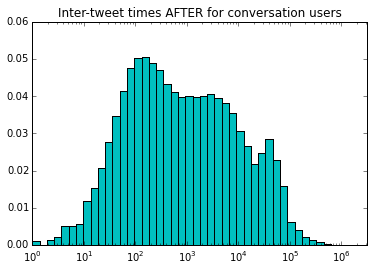

In [38]:
bins=np.logspace(0, int(np.log(max(aSecDiff))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(aSecDiff,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.title('Inter-tweet times AFTER for conversation users')

In [39]:
np.median(aSecDiff)

664.0

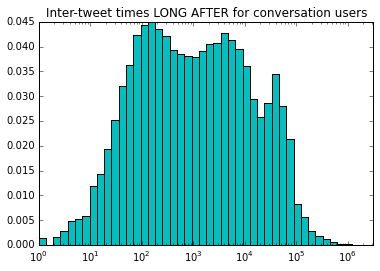

In [40]:
bins=np.logspace(0, int(np.log(max(laSecDiff))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(laSecDiff,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.title('Inter-tweet times LONG AFTER for conversation users')

In [41]:
np.median(laSecDiff)

978.0

In [42]:
st.kruskal(bSecDiff,dSecDiff,aSecDiff)

(842.09049990066774, 1.3879419904349893e-183)

In [43]:
st.ranksums(bSecDiff, dSecDiff)

(27.893255346805002, 3.2211760479233184e-171)

In [44]:
st.ranksums(bSecDiff,aSecDiff)

(10.613650551126053, 2.5748799045452827e-26)

In [45]:
st.ranksums(bSecDiff, laSecDiff)

(-16.707600182370037, 1.1538658556947614e-62)

In [46]:
st.ranksums(dSecDiff,aSecDiff)

(-18.742712634080167, 2.220152227969176e-78)

In [47]:
st.ranksums(dSecDiff,laSecDiff)

(-47.71943384692549, 0.0)

In [48]:
st.ranksums(aSecDiff,laSecDiff)

(-29.200786141870751, 1.8951545803818592e-187)

**SO Tweeting speeds up specifically for our conversation users**

## Check Outgoing Replies

In [49]:
replies=convoDF[convoDF.replyWho!='0']

In [50]:
len(replies)

263739

In [51]:
grouped=replies.groupby('user_id')

In [52]:
replies['secDiff']=(grouped.dateObj.diff()).apply(lambda x: np.nan if pd.isnull(x) else x.item()/(10**9))

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [53]:
before=replies[(replies.dateObj>=pd.to_datetime('2012-10-15 00:00:00')) & (replies.dateObj<pd.to_datetime('2012-10-25 00:00:00'))]

In [54]:
during=replies[(replies.dateObj>=pd.to_datetime('2012-10-25 00:00:00')) & (replies.dateObj<pd.to_datetime('2012-11-04 00:00:00'))]

In [55]:
after=replies[(replies.dateObj>=pd.to_datetime('2012-11-04 00:00:00')) & (replies.dateObj<pd.to_datetime('2012-11-14 00:00:00'))]

In [56]:
lafter=replies[(replies.dateObj>=pd.to_datetime('2012-11-14 00:00:00')) & (replies.dateObj<pd.to_datetime('2012-11-24 00:00:00'))]

In [57]:
bSecDiff=before.secDiff.dropna().tolist()

In [58]:
dSecDiff=during.secDiff.dropna().tolist()

In [59]:
aSecDiff=after.secDiff.dropna().tolist()

In [60]:
laSecDiff=lafter.secDiff.dropna().tolist()

In [61]:
np.median(bSecDiff)

1669.5

In [62]:
np.median(dSecDiff)

1193.0

In [63]:
np.median(aSecDiff)

1369.5

In [64]:
np.median(laSecDiff)

1902.0

In [65]:
st.kruskal(bSecDiff,dSecDiff,aSecDiff,laSecDiff)

(538.81953954595838, 1.8419978781452706e-116)

In [66]:
st.ranksums(bSecDiff,dSecDiff)

(17.643792277198347, 1.1357647261403022e-69)

In [67]:
st.ranksums(bSecDiff,aSecDiff)

(9.6869988117266654, 3.4244346753017698e-22)

In [68]:
st.ranksums(bSecDiff,laSecDiff)

(-2.3108557410389787, 0.020840824418805984)

In [69]:
st.ranksums(dSecDiff,aSecDiff)

(-8.3037935050728109, 1.0083883887943005e-16)

In [70]:
st.ranksums(dSecDiff,laSecDiff)

(-20.288143107202501, 1.6366070049090585e-91)

In [71]:
st.ranksums(aSecDiff,laSecDiff)

(-12.171528526815605, 4.4075067566538958e-34)

## Check the Actual Timings of tweets for Convo Users

In [62]:
df_oneSide.dateObj.head()

455676   2012-10-27 10:41:50
463410   2012-10-27 14:31:14
493533   2012-10-28 11:21:17
493684   2012-10-28 11:24:52
493971   2012-10-28 11:30:16
Name: dateObj, dtype: datetime64[ns]

In [71]:
hours=df_oneSide.dateObj.apply(lambda x: x.hour)

(array([  61225.,   37716.,   21685.,   13577.,    9235.,   10075.,
          17957.,   31010.,   46781.,   64580.,   75941.,   81749.,
          83979.,   82873.,   83595.,   82187.,   83710.,   87768.,
          86076.,   91062.,   98921.,  117413.,  207099.]),
 array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
         11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
         22.,  23.]),
 <a list of 23 Patch objects>)

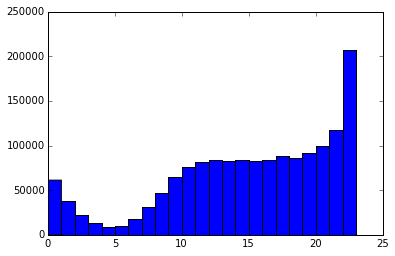

In [78]:
plt.hist(hours.tolist(),23)

### Outgoing replies

In [72]:
hours=replies.dateObj.apply(lambda x: x.hour)

(array([ 10293.,   5697.,   3523.,   2367.,   1565.,   1693.,   2794.,
          4922.,   7437.,  10535.,  13241.,  13808.,  13964.,  13776.,
         14634.,  14001.,  14036.,  15212.,  14987.,  15239.,  17447.,
         18921.,  33647.]),
 array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
         11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
         22.,  23.]),
 <a list of 23 Patch objects>)

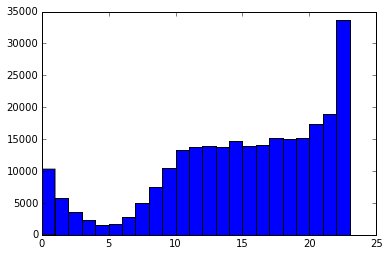

In [73]:
plt.hist(hours.tolist(),23)

## For Only our Convo Users

### Tweet timing

In [74]:
hours=convoDF.dateObj.apply(lambda x: x.hour)

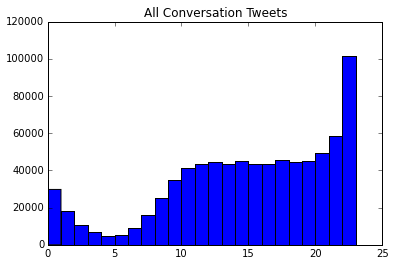

In [75]:
plt.hist(hours,23)
plt.title('All Conversation Tweets')

In [76]:
before=convoDF[(convoDF.dateObj>=pd.to_datetime('2012-10-15 00:00:00')) & (convoDF.dateObj<pd.to_datetime('2012-10-25 00:00:00'))]

In [77]:
during=convoDF[(convoDF.dateObj>=pd.to_datetime('2012-10-25 00:00:00')) & (convoDF.dateObj<pd.to_datetime('2012-11-04 00:00:00'))]

In [78]:
after=convoDF[(convoDF.dateObj>=pd.to_datetime('2012-11-04 00:00:00')) & (convoDF.dateObj<pd.to_datetime('2012-11-14 00:00:00'))]

In [79]:
lafter=convoDF[(convoDF.dateObj>=pd.to_datetime('2012-11-14 00:00:00')) & (convoDF.dateObj<pd.to_datetime('2012-11-24 00:00:00'))]

In [74]:
hours=before.dateObj.apply(lambda x: x.hour)

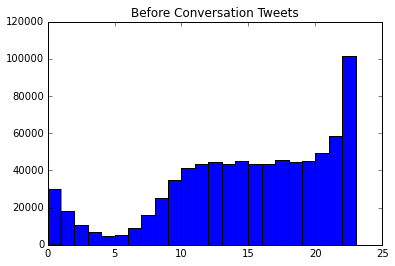

In [80]:
plt.hist(hours,23)
plt.title('Before Conversation Tweets')

In [74]:
hours=during.dateObj.apply(lambda x: x.hour)

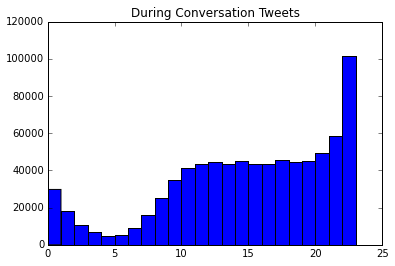

In [81]:
plt.hist(hours,23)
plt.title('During Conversation Tweets')

In [87]:
hours=after.dateObj.apply(lambda x: x.hour)

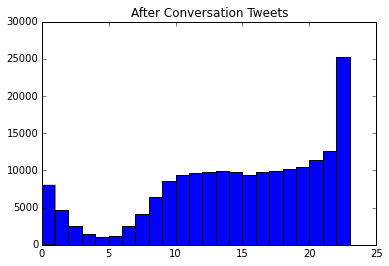

In [89]:
plt.hist(hours.tolist(),23)
plt.title('After Conversation Tweets')

In [90]:
hours=lafter.dateObj.apply(lambda x: x.hour)

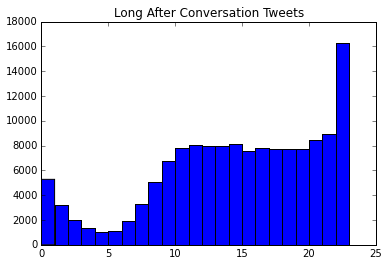

In [91]:
plt.hist(hours.tolist(),23)
plt.title('Long After Conversation Tweets')

### For Replies 

In [92]:
hours=replies.dateObj.apply(lambda x: x.hour)

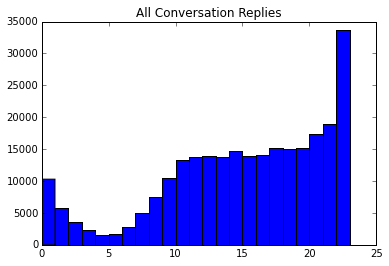

In [94]:
plt.hist(hours.tolist(),23)
plt.title('All Conversation Replies')

In [95]:
before=replies[(replies.dateObj>=pd.to_datetime('2012-10-15 00:00:00')) & (replies.dateObj<pd.to_datetime('2012-10-25 00:00:00'))]

In [96]:
during=replies[(replies.dateObj>=pd.to_datetime('2012-10-25 00:00:00')) & (replies.dateObj<pd.to_datetime('2012-11-04 00:00:00'))]

In [97]:
after=replies[(replies.dateObj>=pd.to_datetime('2012-11-04 00:00:00')) & (replies.dateObj<pd.to_datetime('2012-11-14 00:00:00'))]

In [98]:
lafter=replies[(replies.dateObj>=pd.to_datetime('2012-11-14 00:00:00')) & (replies.dateObj<pd.to_datetime('2012-11-24 00:00:00'))]

In [107]:
b_hours=before.dateObj.apply(lambda x: x.hour)

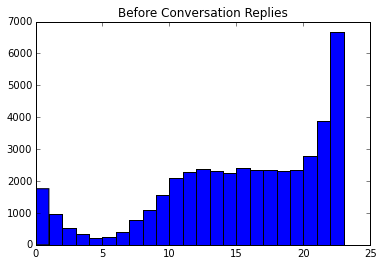

In [108]:
plt.hist(b_hours.tolist(),23)
plt.title('Before Conversation Replies')

In [109]:
d_hours=during.dateObj.apply(lambda x: x.hour)

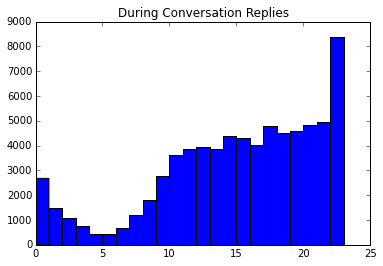

In [110]:
plt.hist(d_hours.tolist(),23)
plt.title('During Conversation Replies')

In [111]:
a_hours=after.dateObj.apply(lambda x: x.hour)

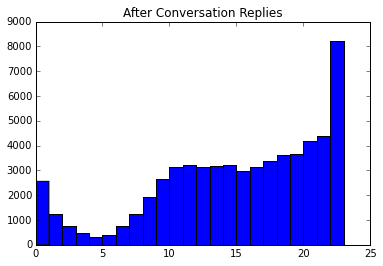

In [112]:
plt.hist(a_hours.tolist(),23)
plt.title('After Conversation Replies')

In [113]:
la_hours=lafter.dateObj.apply(lambda x: x.hour)

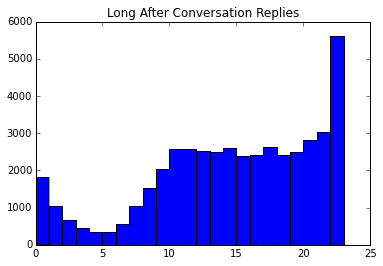

In [114]:
plt.hist(la_hours.tolist(),23)
plt.title('Long After Conversation Replies')

In [115]:
np.median(b_hours)

16.0

In [116]:
np.median(d_hours)

15.0

In [117]:
np.median(a_hours)

15.0

In [118]:
np.median(la_hours)

15.0

In [119]:
st.kruskal(b_hours, d_hours, a_hours, la_hours)

(383.73055731641278, 7.3968845749632353e-83)

In [120]:
st.ranksums(b_hours, d_hours)

(11.84120136122154, 2.3900460732665314e-32)

In [121]:
st.ranksums(b_hours, a_hours)

(9.9558366404497942, 2.3781406119911663e-23)

In [122]:
st.ranksums(b_hours, la_hours)

(19.281329991255365, 7.7069228427798083e-83)

In [123]:
st.ranksums(d_hours, a_hours)

(-1.4148505844327541, 0.15711230915439442)

In [124]:
st.ranksums(d_hours, la_hours)

(10.450916099425067, 1.4511664094892571e-25)

In [125]:
st.ranksums(a_hours, la_hours)

(10.792569372320177, 3.7320704515431749e-27)